In [2]:
import numpy as np
import numpy_financial as npf
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

# .map('{:,.2f}'.format) - - - for big numbers

In [4]:
finance_complaints_df = pd.read_csv('/Users/jakemeissner/Documents/datasets/finance_complaints/consumer_complaints.csv')
finance_complaints_df.head()

/Users/jakemeissner/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (5,11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
0,08/30/2013,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,U.S. Bancorp,CA,95993,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511074
1,08/30/2013,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Wells Fargo & Company,CA,91104,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511080
2,08/30/2013,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,Wells Fargo & Company,NY,11764,NaN,NaN,Postal mail,09/18/2013,Closed with explanation,Yes,No,510473
3,08/30/2013,Student loan,Non-federal student loan,Repaying your loan,Repaying your loan,NaN,NaN,"Navient Solutions, Inc.",MD,21402,NaN,NaN,Email,08/30/2013,Closed with explanation,Yes,Yes,510326
4,08/30/2013,Debt collection,Credit card,False statements or representation,Attempted to collect wrong amount,NaN,NaN,Resurgent Capital Services L.P.,GA,30106,NaN,NaN,Web,08/30/2013,Closed with explanation,Yes,Yes,511067


In [5]:
finance_complaints_df.columns

Index(['date_received', 'product', 'sub_product', 'issue', 'sub_issue',
       'consumer_complaint_narrative', 'company_public_response', 'company',
       'state', 'zipcode', 'tags', 'consumer_consent_provided',
       'submitted_via', 'date_sent_to_company', 'company_response_to_consumer',
       'timely_response', 'consumer_disputed?', 'complaint_id'],
      dtype='object')

In [6]:
finance_complaints_df['product'].value_counts()

Mortgage                   186475
Debt collection            101052
Credit reporting            91854
Credit card                 66468
Bank account or service     62563
Consumer Loan               20990
Student loan                15839
Payday loan                  3877
Money transfers              3812
Prepaid card                 2470
Other financial service       557
Name: product, dtype: int64

Text(0, 0.5, 'Amount')

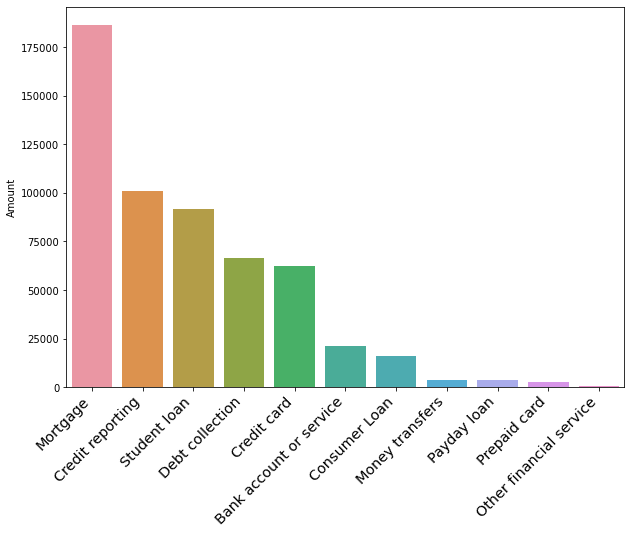

In [22]:
plt.figure(figsize=(10,7))
sns.barplot(x=finance_complaints_df['product'].unique(), y=finance_complaints_df['product'].value_counts(), data=finance_complaints_df)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.ylabel('Amount')

In [28]:
finance_complaints_df['company'].value_counts()

Bank of America                          55998
Wells Fargo & Company                    42024
JPMorgan Chase & Co.                     33881
Equifax                                  31828
Experian                                 30905
                                         ...  
Capital Recovery Corporation                 1
Brian A. Blitz, P.A.                         1
Account Information Management, Corp.        1
Bristlecone, Inc.                            1
ICUL Service Corporation                     1
Name: company, Length: 3605, dtype: int64

Text(0, 0.5, 'Complaints')

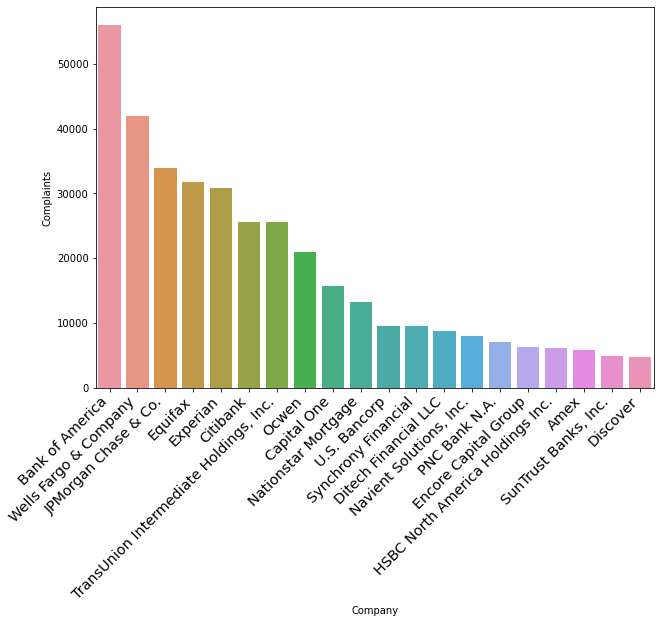

In [37]:
plt.figure(figsize=(10,7))

sns.barplot(x=finance_complaints_df['company'].value_counts().index[:20], y=finance_complaints_df['company'].value_counts()[:20], 
data=finance_complaints_df)

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

plt.xlabel('Company')
plt.ylabel('Complaints')

In [39]:
finance_complaints_df.columns

Index(['date_received', 'product', 'sub_product', 'issue', 'sub_issue',
       'consumer_complaint_narrative', 'company_public_response', 'company',
       'state', 'zipcode', 'tags', 'consumer_consent_provided',
       'submitted_via', 'date_sent_to_company', 'company_response_to_consumer',
       'timely_response', 'consumer_disputed?', 'complaint_id'],
      dtype='object')

In [45]:
finance_complaints_df['company_public_response'].value_counts()

Company chooses not to provide a public response                                                                           52478
Company believes it acted appropriately as authorized by contract or law                                                   15386
Company has responded to the consumer and the CFPB and chooses not to provide a public response                            10426
Company believes complaint caused principally by actions of third party outside the control or direction of the company     1509
Company disputes the facts presented in the complaint                                                                       1395
Company believes the complaint is the result of a misunderstanding                                                          1382
Company can't verify or dispute the facts in the complaint                                                                  1044
Company believes complaint is the result of an isolated error                                    

In [49]:
finance_complaints_df['company_public_response'].unique()[1:]

array(['Company chooses not to provide a public response',
       'Company believes it acted appropriately as authorized by contract or law',
       'Company believes complaint caused principally by actions of third party outside the control or direction of the company',
       'Company believes the complaint is the result of a misunderstanding',
       'Company believes complaint is the result of an isolated error',
       "Company can't verify or dispute the facts in the complaint",
       'Company disputes the facts presented in the complaint',
       'Company believes complaint represents an opportunity for improvement to better serve consumers',
       'Company believes complaint relates to a discontinued policy or procedure',
       'Company has responded to the consumer and the CFPB and chooses not to provide a public response'],
      dtype=object)

Text(0, 0.5, 'Complaints')

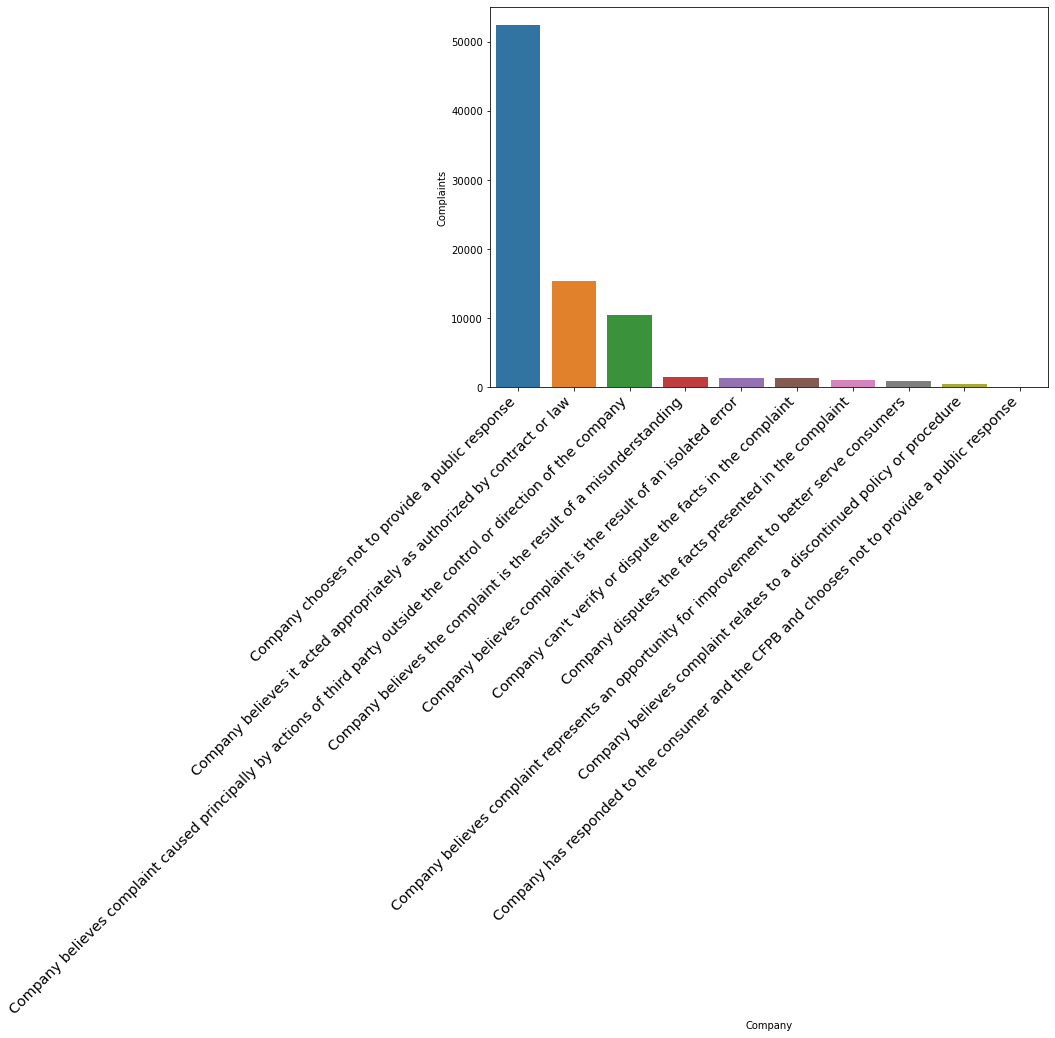

In [50]:
plt.figure(figsize=(10,7))

sns.barplot(x=finance_complaints_df['company_public_response'].unique()[1:], y=finance_complaints_df['company_public_response'].value_counts(), 
data=finance_complaints_df)

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

plt.xlabel('Company')
plt.ylabel('Complaints')

In [52]:
finance_complaints_df['sub_issue'].value_counts()

Account status                              26798
Debt is not mine                            26285
Information is not mine                     19900
Not given enough info to verify debt        12496
Debt was paid                               11328
                                            ...  
Receiving unwanted marketing/advertising      166
Report shared with employer w/o consent       127
Received marketing offer after opted out      125
Qualify for a better loan than offered        107
Insurance terms                                 4
Name: sub_issue, Length: 68, dtype: int64

Text(0, 0.5, 'Complaints')

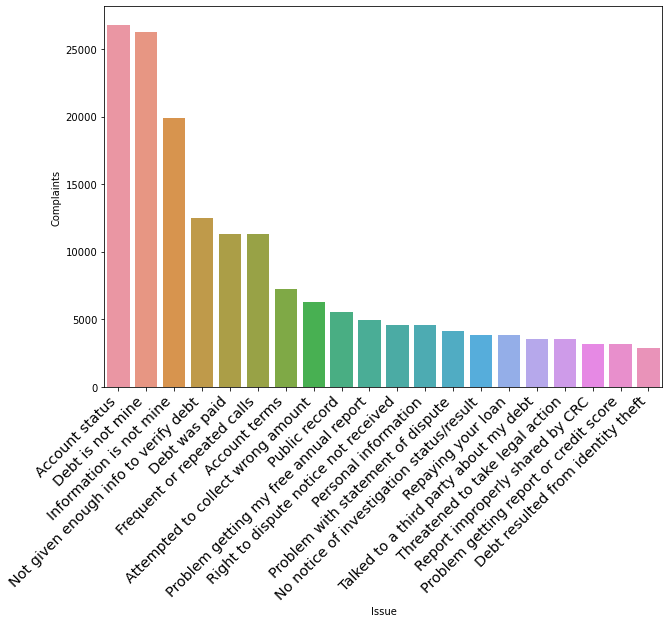

In [55]:
plt.figure(figsize=(10,7))

sns.barplot(x=finance_complaints_df['sub_issue'].value_counts().index[:20], y=finance_complaints_df['sub_issue'].value_counts()[:20], 
data=finance_complaints_df)

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

plt.xlabel('Issue')
plt.ylabel('Complaints')

In [59]:
finance_complaints_df.head(10)

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
0,08/30/2013,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,U.S. Bancorp,CA,95993,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511074
1,08/30/2013,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Wells Fargo & Company,CA,91104,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511080
2,08/30/2013,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,Wells Fargo & Company,NY,11764,NaN,NaN,Postal mail,09/18/2013,Closed with explanation,Yes,No,510473
3,08/30/2013,Student loan,Non-federal student loan,Repaying your loan,Repaying your loan,NaN,NaN,"Navient Solutions, Inc.",MD,21402,NaN,NaN,Email,08/30/2013,Closed with explanation,Yes,Yes,510326
4,08/30/2013,Debt collection,Credit card,False statements or representation,Attempted to collect wrong amount,NaN,NaN,Resurgent Capital Services L.P.,GA,30106,NaN,NaN,Web,08/30/2013,Closed with explanation,Yes,Yes,511067
5,08/30/2013,Credit card,NaN,Application processing delay,NaN,NaN,NaN,Capital One,NY,12206,NaN,NaN,Phone,09/03/2013,Closed with explanation,Yes,Yes,510098
6,08/30/2013,Credit card,NaN,Credit line increase/decrease,NaN,NaN,NaN,Wells Fargo & Company,AZ,85730,NaN,NaN,Postal mail,09/05/2013,Closed with explanation,Yes,No,511062
7,08/30/2013,Bank account or service,Checking account,Deposits and withdrawals,NaN,NaN,NaN,Bank of America,IL,60660,NaN,NaN,Referral,09/04/2013,Closed with explanation,Yes,No,511116
8,08/30/2013,Bank account or service,Checking account,Deposits and withdrawals,NaN,NaN,NaN,Bank of America,GA,30016,NaN,NaN,Referral,09/04/2013,Closed with explanation,Yes,No,511091
9,09/17/2013,Mortgage,Conventional adjustable mortgage (ARM),"Loan modification,collection,foreclosure",NaN,NaN,NaN,"SunTrust Banks, Inc.",CA,94551,NaN,NaN,Web,09/18/2013,Closed with explanation,Yes,Yes,530602


In [61]:
finance_complaints_df['product'].value_counts()

Mortgage                   186475
Debt collection            101052
Credit reporting            91854
Credit card                 66468
Bank account or service     62563
Consumer Loan               20990
Student loan                15839
Payday loan                  3877
Money transfers              3812
Prepaid card                 2470
Other financial service       557
Name: product, dtype: int64